In [1]:
import sys
import time
import numpy as np
from matplotlib import pyplot as plt
import logging

sys.path.append("../../")
from experiments.mwe.mwe_pytorch import time_transform

%matplotlib inline

logging.basicConfig(
    format="%(asctime)-5.5s %(name)-30.30s %(levelname)-7.7s %(message)s",
    datefmt="%H:%M",
    level=logging.DEBUG,
)
logger = logging.getLogger(__name__)
# Output of all other modules (e.g. matplotlib)
for key in logging.Logger.manager.loggerDict:
    if "manifold_flow" not in key:
        logging.getLogger(key).setLevel(logging.WARNING)


## Timing function

In [2]:
def take_time(*args, **kwargs):
    results = [time_transform(*args, **kwargs) for _ in range(3)]
    return np.mean(results), np.std(results)

## x dimension

In [3]:
xdims = [2,5,10,20,50,100,200]

xdim_jacobian_means = []
xdim_jacobian_stds = []
xdim_det_means = []
xdim_det_stds = []

for xdim in xdims:
    print("xdim = {}".format(xdim))
    mean_jac, std_jac = take_time(features=xdim, batchsize=100, hidden_features=100, hidden_layers=5, calculate_full_jacobian=True)
    mean_det, std_det = take_time(features=xdim, batchsize=100, hidden_features=100, hidden_layers=5, calculate_full_jacobian=False)
    xdim_jacobian_means.append(mean_jac)
    xdim_jacobian_stds.append(std_jac)
    xdim_det_means.append(mean_det)
    xdim_det_stds.append(std_det)


xdim = 2
xdim = 5
xdim = 10
xdim = 20
xdim = 50
xdim = 100
xdim = 200


## Hidden layers

In [4]:
hiddens = [1,2,4,7,10,14,20]

hidden_jacobian_means = []
hidden_jacobian_stds = []
hidden_det_means = []
hidden_det_stds = []

for hidden in hiddens:
    print("hidden_layers = {}".format(hidden))
    mean_jac, std_jac = take_time(features=100, batchsize=100, hidden_features=100, hidden_layers=hidden, calculate_full_jacobian=True)
    mean_det, std_det = take_time(features=100, batchsize=100, hidden_features=100, hidden_layers=hidden, calculate_full_jacobian=False)
    hidden_jacobian_means.append(mean_jac)
    hidden_jacobian_stds.append(std_jac)
    hidden_det_means.append(mean_det)
    hidden_det_stds.append(std_det)



hidden_layers = 1
hidden_layers = 2
hidden_layers = 4
hidden_layers = 7
hidden_layers = 10
hidden_layers = 14
hidden_layers = 20


## Batch size

In [5]:
batchsizes = [1,2,5,10,20,50,100,200]

batchsize_jacobian_means = []
batchsize_jacobian_stds = []
batchsize_det_means = []
batchsize_det_stds = []

for batchsize in batchsizes:
    print("batchsize = {}".format(batchsize))
    mean_jac, std_jac = take_time(features=100, batchsize=batchsize, hidden_features=100, hidden_layers=5, calculate_full_jacobian=True)
    mean_det, std_det = take_time(features=100, batchsize=batchsize, hidden_features=100, hidden_layers=5, calculate_full_jacobian=False)
    batchsize_jacobian_means.append(mean_jac)
    batchsize_jacobian_stds.append(std_jac)
    batchsize_det_means.append(mean_det)
    batchsize_det_stds.append(std_det)


batchsize = 1
batchsize = 2
batchsize = 5
batchsize = 10
batchsize = 20
batchsize = 50
batchsize = 100
batchsize = 200


## Plot

In [9]:
xdim_jacobian_means = np.array(xdim_jacobian_means)
xdim_jacobian_stds = np.array(xdim_jacobian_stds)
batchsize_jacobian_means = np.array(batchsize_jacobian_means)
batchsize_jacobian_stds = np.array(batchsize_jacobian_stds)
hidden_jacobian_means = np.array(hidden_jacobian_means)
hidden_jacobian_stds = np.array(hidden_jacobian_stds)
xdim_det_means = np.array(xdim_det_means)
xdim_det_stds = np.array(xdim_det_stds)
batchsize_det_means = np.array(batchsize_det_means)
batchsize_det_stds = np.array(batchsize_det_stds)
hidden_det_means = np.array(hidden_det_means)
hidden_det_stds = np.array(hidden_det_stds)


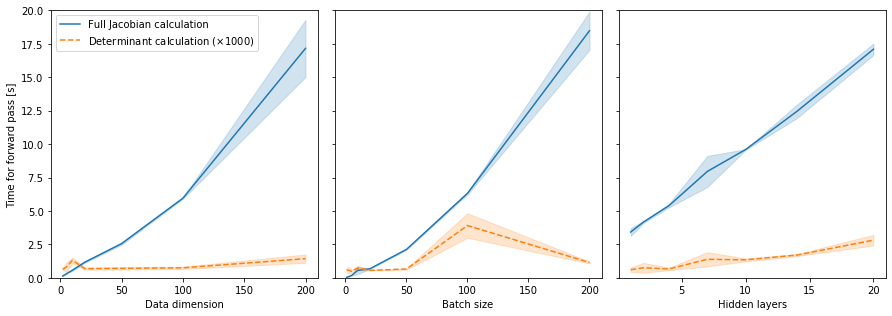

In [27]:
factor = 1000
ymin, ymax = 0., 20.

fig = plt.figure(figsize=(12.5,4.5))

ax = plt.subplot(1,3,1)
plt.fill_between(xdims, xdim_jacobian_means - xdim_jacobian_stds, xdim_jacobian_means + xdim_jacobian_stds, color="C0", alpha=0.2)
plt.plot(xdims, xdim_jacobian_means, c="C0", ls="-", label="Full Jacobian calculation")
plt.fill_between(xdims, factor*(xdim_det_means-xdim_det_stds), factor*(xdim_det_means+xdim_det_stds), color="C1", alpha=0.2)
plt.plot(xdims, factor*xdim_det_means, c="C1", ls="--", label=r"Determinant calculation ($\times {}$)".format(factor))
# x_ = np.linspace(0.,200.,100)
# y_ = x_**2 * xdim_jacobian_means[4] / 50**2
# plt.plot(x_, y_, ls=":", c="C0")
plt.legend(loc="upper left")
plt.xlabel("Data dimension")
plt.ylabel("Time for forward pass [s]")
plt.ylim(ymin,ymax)

ax = plt.subplot(1,3,2)
plt.fill_between(batchsizes, batchsize_jacobian_means-batchsize_jacobian_stds, batchsize_jacobian_means+batchsize_jacobian_stds, color="C0", alpha=0.2)
plt.plot(batchsizes, batchsize_jacobian_means, c="C0", ls="-", label="Full Jacobian calculation")
plt.fill_between(batchsizes, factor*(batchsize_det_means-batchsize_det_stds), factor*(batchsize_det_means+batchsize_det_stds), color="C1", alpha=0.2)
plt.plot(batchsizes, factor*batchsize_det_means, c="C1", ls="--", label=r"Determinant calculation ($\times {}$)".format(factor))
plt.xlabel("Batch size")
plt.ylabel("")
ax.set_yticklabels([])
plt.ylim(ymin,ymax)

ax = plt.subplot(1,3,3)
plt.fill_between(hiddens, hidden_jacobian_means-hidden_jacobian_stds, hidden_jacobian_means+hidden_jacobian_stds, color="C0", alpha=0.2)
plt.plot(hiddens, hidden_jacobian_means, c="C0", ls="-", label="Full Jacobian calculation")
plt.fill_between(hiddens, factor*(hidden_det_means-hidden_det_stds), factor*(hidden_det_means+hidden_det_stds), color="C1", alpha=0.2)
plt.plot(hiddens, factor*hidden_det_means, c="C1", ls="--", label=r"Determinant calculation ($\times {}$)".format(factor))
plt.xlabel("Hidden layers")
plt.ylabel("Time for forward pass [s]")
plt.ylabel("")
ax.set_yticklabels([])
plt.ylim(ymin,ymax)

plt.tight_layout()
plt.savefig("simple_manifold_flow_timing.pdf")
